In [1]:
from keras.datasets import boston_housing
from keras.datasets import reuters
import numpy as np
import os
from keras.models import Sequential
import tensorflow as tf
from keras import models,Model
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
import time
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from utils import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import *
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequential

Using TensorFlow backend.


In [2]:
#開檔
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度_20群.xls',encoding='utf-16')
df = df.loc[:, ["age","serveTime","credLimit","Loan","SalPerY","holdCard","Career","credLimit_group"]] 
#若某raw有NAN則整RAW刪除
df =df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    ) 
#把分群的Y轉成int
df['credLimit_group'] = df['credLimit_group'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1686
Data columns (total 8 columns):
age                1680 non-null float64
serveTime          1680 non-null float64
credLimit          1680 non-null int64
Loan               1680 non-null float64
SalPerY            1680 non-null int64
holdCard           1680 non-null int64
Career             1680 non-null int64
credLimit_group    1680 non-null int32
dtypes: float64(3), int32(1), int64(4)
memory usage: 111.6 KB


In [3]:
train_data, test_data, train_targets, test_targets = train_test_split(df.loc[:, ["age","serveTime","Loan","SalPerY","holdCard","Career"]] , df.loc[:, ["credLimit_group"]] , test_size=0.3, random_state=42)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)
#轉array
train_data = np.array(train_data).astype(float)
test_data = np.array(test_data).astype(float)
train_targets = np.array(train_targets).astype(int)
test_targets = np.array(test_targets).astype(int)
#把Y弄成onehot
def to_one_hot(labels, dimension=20):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results
train_targets = to_one_hot(train_targets)
test_targets = to_one_hot(test_targets)

(1176, 6)
(504, 6)
(1176, 1)
(504, 1)


In [4]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(1176, 6)
(504, 6)
(1176, 20)
(504, 20)


In [5]:
#正規化
#因為relu,所以這個比較好
train_data_max = train_data.max(axis=0)
train_data_min = train_data.min(axis=0)
train_data_range = train_data_max-train_data_min
train_data-=train_data_min
train_data/=train_data_range

test_data_max = test_data.max(axis=0)
test_data_min = test_data.min(axis=0)
test_data_range = test_data_max-test_data_min
test_data-=test_data_min
test_data/=test_data_range

# CNN

In [6]:
model_CNN = Sequential()
model_CNN.add(layers.Embedding(6,6,input_length=6))
model_CNN.add(layers.Conv1D(6,6,activation='relu'))
model_CNN.add(layers.GlobalMaxPool1D())
model_CNN.add(layers.Dense(20))
model_CNN.add(Activation('softmax'))
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 6, 6)              36        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 6)              222       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
Total params: 398
Trainable params: 398
Non-trainable params: 0
_________________________________________________________________


# GRU

In [7]:
model_GRU = Sequential()
model_GRU.add(layers.Bidirectional(layers.GRU(6),input_shape=(6,1)))
model_GRU.add(layers.Dense(20))
model_GRU.add(Activation('softmax'))
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 12)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                260       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
Total params: 548
Trainable params: 548
Non-trainable params: 0
_________________________________________________________________


# 一般的

In [8]:
#模型定義
model = models.Sequential()
model.add(layers.Dense(30, activation='relu',input_shape=(6 , )))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
Total params: 1,925
Trainable params: 1,925
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras.layers import Conv2D, MaxPooling2D, Input
inputs = Input(shape=(6,))
x = Dense(3, activation='tanh',kernel_initializer='random_uniform')(inputs)
x = Dense(20, activation='tanh')(x)
x = Dropout(0.25)(x)

y = Dense(4, activation='sigmoid')(inputs)
y = Dense(20, activation='sigmoid')(y)

z = Dense(5, activation='relu')(inputs)
z = Dense(20, activation='relu')(z)


merged  = concatenate([x, y,z], axis=1)
output = Dense(20, activation='softmax')(merged )
model = Model(inputs=inputs, outputs=output)

sgd = optimizers.SGD(lr=0.01, momentum=0.01, decay=0.001, nesterov=False)
model.summary()
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data,train_targets,
                   epochs=100,
                   batch_size=128,
                   validation_data=(test_data,test_targets))

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 6)            0                                            
__________________________________________________________________________________________________
dense_129 (Dense)               (None, 3)            21          input_19[0][0]                   
__________________________________________________________________________________________________
dense_130 (Dense)               (None, 20)           80          dense_129[0][0]                  
__________________________________________________________________________________________________
dense_131 (Dense)               (None, 4)            28          input_19[0][0]                   
___________________________________________________________________________________________

1176/1176 [==============================] - 0s 16us/step - loss: 2.1263 - accuracy: 0.2704 - val_loss: 2.1208 - val_accuracy: 0.2599
Epoch 39/100
1176/1176 [==============================] - 0s 15us/step - loss: 2.1211 - accuracy: 0.2704 - val_loss: 2.1170 - val_accuracy: 0.2599
Epoch 40/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.1193 - accuracy: 0.2704 - val_loss: 2.1132 - val_accuracy: 0.2599
Epoch 41/100
1176/1176 [==============================] - 0s 15us/step - loss: 2.1142 - accuracy: 0.2704 - val_loss: 2.1098 - val_accuracy: 0.2599
Epoch 42/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.1125 - accuracy: 0.2704 - val_loss: 2.1065 - val_accuracy: 0.2599
Epoch 43/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.1087 - accuracy: 0.2704 - val_loss: 2.1033 - val_accuracy: 0.2599
Epoch 44/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.1080 - accuracy: 0.2704 - val_loss: 2.1001 - val_a

Epoch 94/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.0432 - accuracy: 0.2696 - val_loss: 2.0394 - val_accuracy: 0.2599
Epoch 95/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.0451 - accuracy: 0.2721 - val_loss: 2.0387 - val_accuracy: 0.2599
Epoch 96/100
1176/1176 [==============================] - 0s 13us/step - loss: 2.0445 - accuracy: 0.2704 - val_loss: 2.0384 - val_accuracy: 0.2599
Epoch 97/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.0387 - accuracy: 0.2704 - val_loss: 2.0380 - val_accuracy: 0.2599
Epoch 98/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.0444 - accuracy: 0.2704 - val_loss: 2.0374 - val_accuracy: 0.2599
Epoch 99/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.0424 - accuracy: 0.2713 - val_loss: 2.0370 - val_accuracy: 0.2599
Epoch 100/100
1176/1176 [==============================] - 0s 14us/step - loss: 2.0446 - accuracy: 0.2679 - val_loss: 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from c

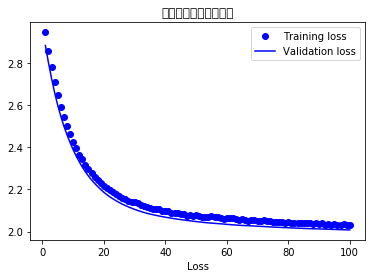

In [49]:
#繪圖

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+ 1)
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('訓練與驗證的損失函數')
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.legend()
plt.show()

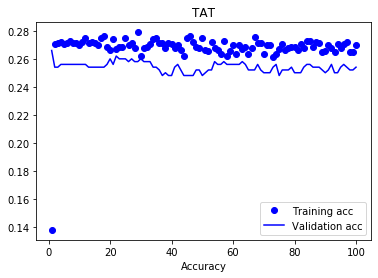

In [50]:
plt.clf()
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('TAT')
plt.xlabel('Epohs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

In [2]:
def get_model(inp):#重新建立模型，与原来不一样的是这里inp是传入
    n_classes = 10
    #inp=Input(shape=(120,39))#原来的inp是函数里，传入可以三个公用
    reshape=Reshape((1,120,39))(inp)
 #   pre=ZeroPadding2D(padding=(1, 1))(reshape)
    # 1
    #reshape=BatchNormalization()(reshape)
    conv1=Convolution2D(32, 3, 3, border_mode='same',init='glorot_uniform')(reshape)
    #model.add(Activation('relu'))
    l1=PReLU()(conv1)
    l1=BatchNormalization()(l1)
 
    conv2=ZeroPadding2D(padding=(1, 1))(l1)
    conv2=Convolution2D(32, 3, 3, border_mode='same',init='glorot_uniform')(conv2)
    #model.add(Activation('relu'))
    l2=PReLU()(conv2)
    l2=BatchNormalization()(l2)
 
    m2=AveragePooling2D((3, 3), strides=(3, 3))(l2)
    d2=Dropout(0.25)(m2)
    # 2
    conv3=ZeroPadding2D(padding=(1, 1))(d2)
    conv3=Convolution2D(64, 3, 3, border_mode='same',init='glorot_uniform')(conv3)
    #model.add(Activation('relu'))
    l3=PReLU()(conv3)
    l3=BatchNormalization()(l3)
 
    conv4=ZeroPadding2D(padding=(1, 1))(l3)
    conv4=Convolution2D(64, 3, 3, border_mode='same',init='glorot_uniform')(conv4)
    #model.add(Activation('relu'))
    l4=PReLU()(conv4)
    l4=BatchNormalization()(l4)
 
    m4=AveragePooling2D((3, 3), strides=(3, 3))(l4)
    d4=Dropout(0.25)(m4)
    
    g=GlobalAveragePooling2D()(d4)
#4
#    conv4=Convolution2D(32, 3, 3, border_mode='same',init='glorot_uniform')(d3)
#    conv4=BatchNormalization()(conv4)
#    #model.add(Activation('relu'))
#    l4=LeakyReLU(alpha=0.33)(conv4)
#    m4=MaxPooling2D((2, 2))(l4)
#    d4=Dropout(0.25)(m4)
    
    #f=Flatten()(g)
    Den=Dense(1024)(g)
    #model.add(Activation('relu'))
    ld=PReLU()(Den)
    ld=Dropout(0.5)(ld)
    result=Dense(n_classes, activation='softmax')(ld)
 
 
 
    model=Model(input=inp,outputs=result)
    return model


In [5]:

def merge_model():
    inp=Input(shape=(120,39))#融合主要就是Input是同样的，所以重新建立模型
    model1=get_model(inp)
    model2=get_model(inp)
    model3=get_model(inp)
    model1.load_weights(model_path+"CNN_mfcc1.h5")#加载各自权重
    model2.load_weights(model_path+"CNN_mfcc2.h5")#加载各自权重
    model3.load_weights(model_path+"CNN_mfcc3.h5")#加载各自权重
    
    r1=model1.output#获得输出
    r2=model2.output
    r3=model3.output
    
    x=concatenate([r1,r2,r3],axis=1)#拼接输出，融合成功
    model=Model(input=inp,outputs=x)
    return model


In [8]:


inp=origin_model.input
x=origin_model.output

den=Dense(200,name="fine_dense")(x)
l=PReLU()(den)
l=Dropout(0.5)(l)
result=Dense(10,activation="softmax")(l)

model=Model(input=inp,outputs=result)
model.summary()
#编译model
adam = keras.optimizers.Adam(lr = 0.0005, beta_1=0.95, beta_2=0.999,epsilon=1e-08)
#adam = keras.optimizers.Adam(lr = 0.001, beta_1=0.95, beta_2=0.999,epsilon=1e-08)
#sgd = keras.optimizers.SGD(lr = 0.001, decay = 1e-06, momentum = 0.9, nesterov = False)

#reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.1, patience = 2,verbose = 1, min_lr = 0.00000001, mode = 'min')
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])



NameError: name 'origin_model' is not defined

In [ ]:
inputs = Input(shape=(6,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data,train_targets,
                   epochs=20,
                   batch_size=32,
                   validation_data=(test_data,test_targets))